## Seasonality and Trend Decomposition using MA and Averages

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample monthly data for 3 years
np.random.seed(42)  # for reproducibility
months = 36
time = np.arange(months)
trend = 0.5 * time
seasonality = 10 * np.sin(2 * np.pi * time / 12)
noise = np.random.normal(0, 2, months)
data = trend + seasonality + noise

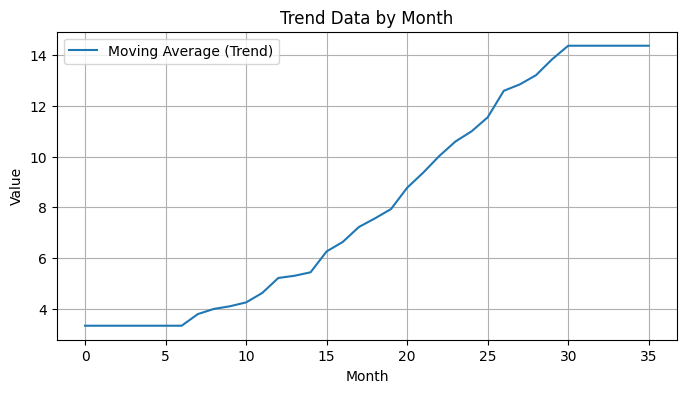

In [14]:
# Step 1: Calculate centered moving average (12-month window)
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

ma = moving_average(data, 12)
ma = np.pad(ma, (6, 5), mode='edge')  # Pad to match original data length

# Plot results
plt.figure(figsize=(8, 4))
plt.plot(time, ma, label='Moving Average (Trend)')
plt.legend()
plt.title('Trend Data by Month')
plt.xlabel('Month')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [15]:
# Step 2: Detrend the data
detrended = data - ma

In [31]:
# Step 3: Calculate seasonal component
seasonal = np.zeros(12)
for i in range(12):
    seasonal[i] = np.mean(detrended[i::12])

In [32]:
# Step 4: Ensure seasonal components sum to zero (removes monthly average)
seasonal = seasonal - np.mean(seasonal)

In [37]:
# Step 5: Replicate seasonal pattern for all 3 years
seasonal_full = np.tile(seasonal, 3)

In [40]:
# NEW STEP: Remove both trend and seasonality to get residuals
residuals = data - ma - seasonal_full

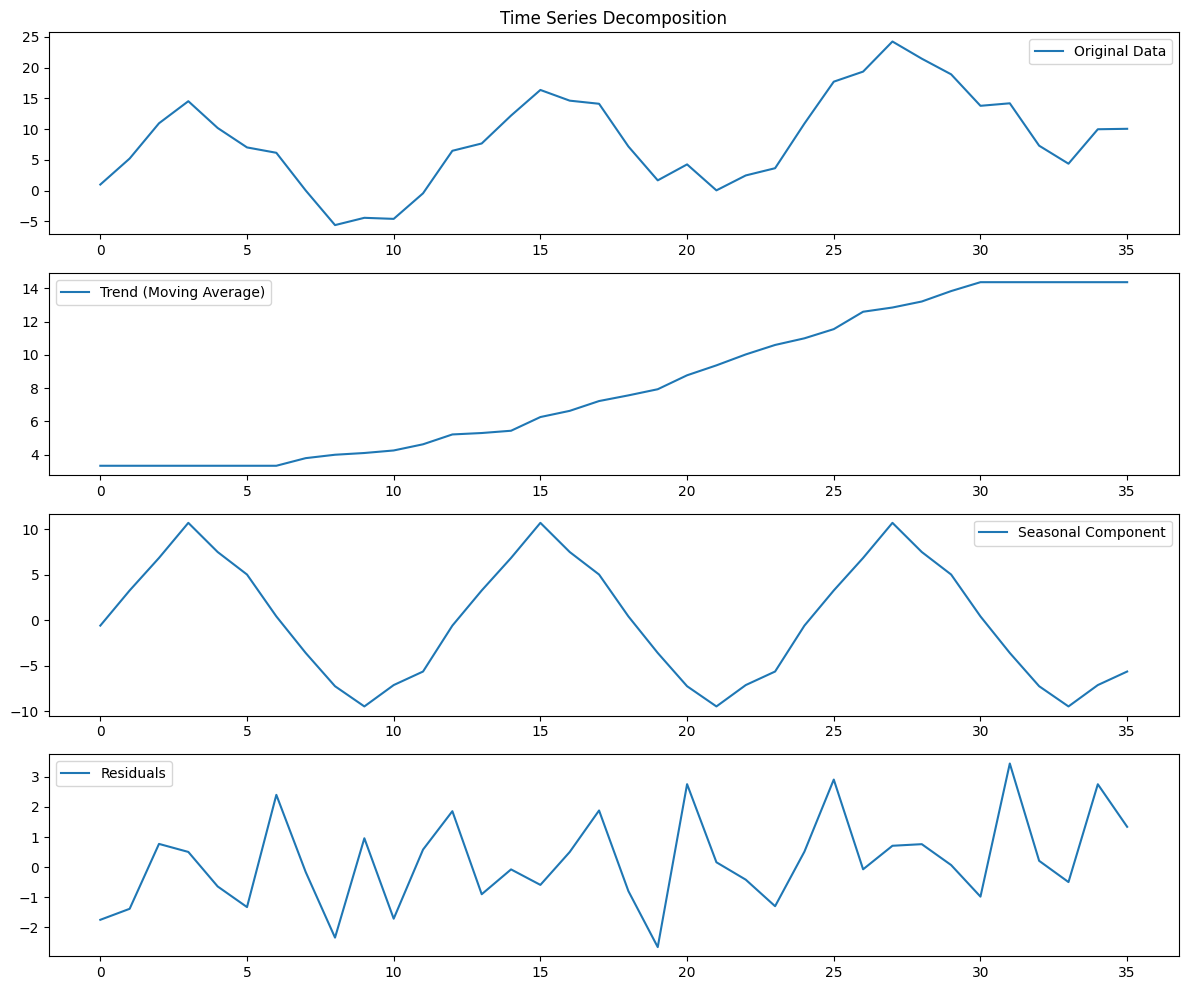

In [44]:
# Plot results
plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(time, data, label='Original Data')
plt.legend()
plt.title('Time Series Decomposition')

plt.subplot(4, 1, 2)
plt.plot(time, ma, label='Trend (Moving Average)')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(time, seasonal_full, label='Seasonal Component')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(time, residuals, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()

In [46]:
# Print the components for the first few months
print("First 5 months decomposition:")
print("Month | Original | Trend | Seasonal | Residual")
print("-----|----------|-------|----------|----------")
for i in range(5):
    print(f"{i+1:5d} | {data[i]:8.2f} | {ma[i]:5.2f} | {seasonal_full[i]:8.2f} | {residuals[i]:8.2f}")

First 5 months decomposition:
Month | Original | Trend | Seasonal | Residual
-----|----------|-------|----------|----------
    1 |     0.99 |  3.34 |    -0.60 |    -1.75
    2 |     5.22 |  3.34 |     3.27 |    -1.38
    3 |    10.96 |  3.34 |     6.84 |     0.77
    4 |    14.55 |  3.34 |    10.70 |     0.51
    5 |    10.19 |  3.34 |     7.49 |    -0.64
